# Introduction

Hello World!

In [13]:
"Hello World!"

'Hello World!'

In [14]:
import pandas as pd

log = pd.read_csv("../../../software-data/projects/linux/linux_blame_log.csv.gz")
log.head()

,path,author,timestamp,line
0,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,1448528085000000000,1
1,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,1448528085000000000,2
2,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,1448528085000000000,3
3,drivers/scsi/bfa/bfad_drv.h,Jing Huang,1253753175000000000,4
4,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,1448528085000000000,5


In [15]:
log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5665947 entries, 0 to 5665946
Data columns (total 4 columns):
path         object
author       object
timestamp    int64
line         int64
dtypes: int64(2), object(2)
memory usage: 172.9+ MB


In [16]:
top10 = log['author'].value_counts().head(10)
top10

Linus Torvalds           838200
Hans Verkuil             118432
Mauro Carvalho Chehab    102107
Michael Chan              53945
Mike Marciniszyn          44843
Ralph Campbell            42453
Nicholas Bellinger        41823
Laurent Pinchart          40438
Antti Palosaari           40390
Alexander Duyck           39307
Name: author, dtype: int64

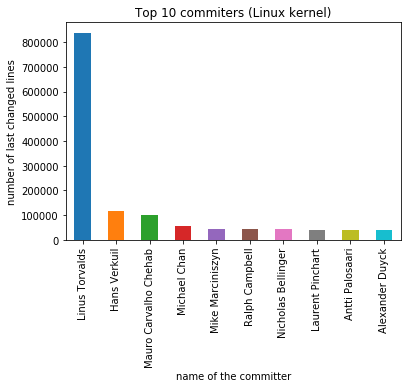

In [17]:
%matplotlib inline
ax = top10.plot.bar(title="Top 10 commiters (Linux kernel)")
ax.set_ylabel("number of last changed lines")
ax.set_xlabel("name of the committer");

# Vergessene Bereiche des Linux Kernels

In [18]:
log['timestamp'] = pd.to_datetime(log['timestamp'])
log.head()

,path,author,timestamp,line
0,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,2015-11-26 08:54:45,1
1,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,2015-11-26 08:54:45,2
2,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,2015-11-26 08:54:45,3
3,drivers/scsi/bfa/bfad_drv.h,Jing Huang,2009-09-24 00:46:15,4
4,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,2015-11-26 08:54:45,5


In [19]:
log['age'] = log['timestamp'].max() - log['timestamp']
log.head()

,path,author,timestamp,line,age
0,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,2015-11-26 08:54:45,1,867 days 08:31:24
1,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,2015-11-26 08:54:45,2,867 days 08:31:24
2,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,2015-11-26 08:54:45,3,867 days 08:31:24
3,drivers/scsi/bfa/bfad_drv.h,Jing Huang,2009-09-24 00:46:15,4,3121 days 16:39:54
4,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,2015-11-26 08:54:45,5,867 days 08:31:24


In [20]:
log['component'] = log['path'].str.split("/").str[:2].str.join(":")
log.head()

,path,author,timestamp,line,age,component
0,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,2015-11-26 08:54:45,1,867 days 08:31:24,drivers:scsi
1,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,2015-11-26 08:54:45,2,867 days 08:31:24,drivers:scsi
2,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,2015-11-26 08:54:45,3,867 days 08:31:24,drivers:scsi
3,drivers/scsi/bfa/bfad_drv.h,Jing Huang,2009-09-24 00:46:15,4,3121 days 16:39:54,drivers:scsi
4,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,2015-11-26 08:54:45,5,867 days 08:31:24,drivers:scsi


In [21]:
age_per_component = log.groupby('component')['age'].min()
age_per_component.head()

component
arch:arc     523 days 22:47:17
arch:arm      55 days 11:24:25
arch:i386   3839 days 10:01:37
arch:ia64   2572 days 04:21:23
arch:mips   1826 days 19:57:33
Name: age, dtype: timedelta64[ns]

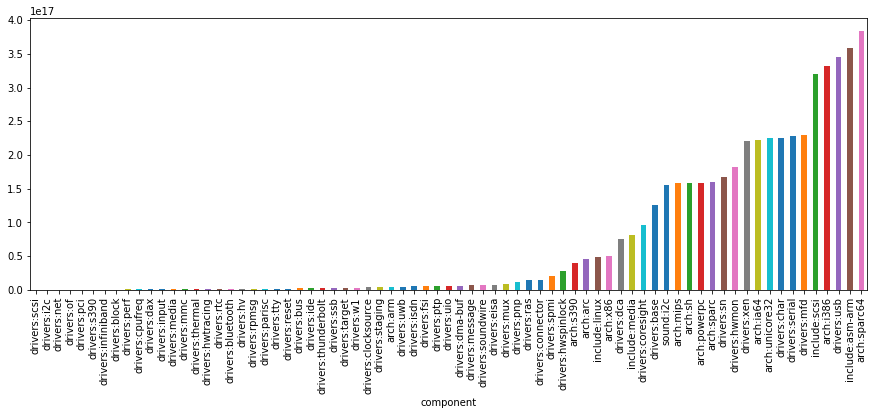

In [22]:
age_per_component.sort_values().plot.bar(figsize=[15,5]);

# Identifikation von Wissensinseln

## Laden und Vorbereiten der Git-Log-Daten

In [ ]:
import pandas as pd

log = pd.read_csv("../../../software-data/projects/linux/linux_blame_log.csv.gz")
log['timestamp'] = pd.to_datetime(log['timestamp'])
log.head()

## Gruppieren mit minimalen Zeitdauer und Zeilenanzahl

In [23]:
knowledge = log.groupby(
    ['path', 'author']).agg(
        {'timestamp':'min', 'line':'count'}
    )
knowledge.head()

timestamp  line
path                            author                                       
arch/arc/kernel/time.c          Anna-Maria Gleixner 2016-07-13 17:17:07    13
                                Daniel Lezcano      2016-06-15 12:50:12    31
                                Noam Camus          2016-01-01 10:18:49    18
                                Vineet Gupta        2013-01-18 09:42:18   243
                                Viresh Kumar        2015-07-16 11:26:14     6

## Wissensanteile berechnen

In [24]:
knowledge['all'] = knowledge.groupby('path')['line'].transform('sum')
knowledge['knowing'] = knowledge['line'] / knowledge['all']
knowledge.head()

timestamp  line  \
path                            author                                          
arch/arc/kernel/time.c          Anna-Maria Gleixner 2016-07-13 17:17:07    13   
                                Daniel Lezcano      2016-06-15 12:50:12    31   
                                Noam Camus          2016-01-01 10:18:49    18   
                                Vineet Gupta        2013-01-18 09:42:18   243   
                                Viresh Kumar        2015-07-16 11:26:14     6   

                                                     all   knowing  
path                            author                              
arch/arc/kernel/time.c          Anna-Maria Gleixner  311  0.041801  
                                Daniel Lezcano       311  0.099678  
                                Noam Camus           311  0.057878  
                                Vineet Gupta         311  0.781350  
                                Viresh Kumar         311  0.019293

## Maximales Wissen pro Datei identifizieren

In [25]:
max_knowledge_per_file = knowledge.groupby(['path'])['knowing'].transform(max)
knowledge_carriers = knowledge[knowledge['knowing'] == max_knowledge_per_file]
knowledge_carriers = knowledge_carriers.reset_index(level=1)
knowledge_carriers.head()

,author,timestamp,line,all,knowing
path,,,,,
arch/arc/kernel/time.c,Vineet Gupta,2013-01-18 09:42:18,243,311,0.781350
arch/arm/common/timer-sp.c,Rob Herring,2011-12-12 21:29:08,111,169,0.656805
arch/arm/include/asm/hardware/arm_timer.h,Russell King,2010-01-16 15:07:08,24,29,0.827586
arch/arm/kernel/perf_event.c,Jamie Iles,2010-02-02 19:25:44,176,523,0.336520
arch/arm/mach-at91/at91rm9200_time.c,David Brownell,2007-07-31 00:41:26,81,95,0.852632


## Export in D3 Visualisierung "Zoomable Circle Packing"

In [26]:
from ausi import d3
d3.create_json_for_zoomable_circle_packing(
    knowledge_carriers.reset_index(),
    'author',
    'author',
    'path',
    '/',
    'all',
    'knowing',
    'linux_circle_packing'
)

JSON file produced in 'C:\dev\repos\software-analytics\demos\20181213_EuregJUG_Aachen\linux_circle_packing.json'
HTML file produced in 'C:\dev\repos\software-analytics\demos\20181213_EuregJUG_Aachen\linux_circle_packing.html'
